# Exploratory data analysis of merge (spotify and grammy awards dataset)

#### Libraries used

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine, text
import sys

#### Connection to the database

In [2]:
sys.path.append('../config/')
from config import configuration

config = configuration('../config/database.ini')
db_url = f"postgresql+psycopg2://{config['user']}:{config['password']}@{config['host']}/{config['database']}"
engine = create_engine(db_url)

#### Get data from postgreSQL

In [3]:
grammy_df = pd.read_csv('../data/the_grammy_awards.csv')
spotify_df = pd.read_csv('../data/spotify_dataset.csv')

In [7]:
spotify_df.info()
spotify_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      114000 non-null  int64  
 1   artists         113999 non-null  object 
 2   album_name      113999 non-null  object 
 3   track_name      113999 non-null  object 
 4   popularity      114000 non-null  int64  
 5   duration_ms     114000 non-null  int64  
 6   explicit        114000 non-null  bool   
 7   danceability    114000 non-null  float64
 8   energy          114000 non-null  float64
 9   loudness        114000 non-null  float64
 10  valence         114000 non-null  float64
 11  tempo           114000 non-null  float64
 12  time_signature  114000 non-null  int64  
 13  track_genre     114000 non-null  object 
dtypes: bool(1), float64(5), int64(4), object(4)
memory usage: 11.4+ MB


,Unnamed: 0,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,0.167,119.949,4,acoustic


In [5]:
grammy_df.info()
grammy_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


## Merge testing

In [8]:
columns_to_drop = [
    'Unnamed: 0',
    'instrumentalness',
    'acousticness',
    'speechiness',
    'mode',
    'liveness',
    'key',
    'track_id',
]

spotify_df.drop(columns=columns_to_drop, axis=1, inplace=True)

columns_to_drop = [
    'workers',
    'img',
]

grammy_df.drop(columns=columns_to_drop, axis=1, inplace=True)

KeyError: "['instrumentalness', 'acousticness', 'speechiness', 'mode', 'liveness', 'key', 'track_id'] not found in axis"

#### By name of artist - artists & nominee - track name

In [25]:
# Normalize the columns that we will use
spotify_df.artists = spotify_df.artists.str.lower().str.split(';').str[0]
grammy_df.artist = grammy_df.artist.str.lower()

spotify_df.track_name = spotify_df.track_name.str.lower().str.replace(r"\(.*\)", "", regex=True)
grammy_df.nominee = grammy_df.nominee.str.lower().str.replace(r"\(.*\)", "", regex=True)

primary_merge = pd.merge(spotify_df, grammy_df, left_on='artists', right_on='artist', how='inner')
secondary_merge = pd.merge(spotify_df, grammy_df, left_on='track_name', right_on='nominee', how='inner')

final_merged_df = pd.concat([primary_merge, secondary_merge]).drop_duplicates()

# Inspect the result
print(final_merged_df.head())
print("Number of register:", final_merged_df.shape[0])


   Unnamed: 0     artists                           album_name  \
0           7  jason mraz  We Sing. We Dance. We Steal Things.   
1           8  jason mraz  We Sing. We Dance. We Steal Things.   
2          11  jason mraz           Love Is a Four Letter Word   
3          18  jason mraz  We Sing. We Dance. We Steal Things.   
4          20  jason mraz  We Sing. We Dance. We Steal Things.   

        track_name  popularity  duration_ms  explicit  danceability  energy  \
0        i'm yours          80       242946     False         0.703   0.444   
1            lucky          74       189613     False         0.625   0.414   
2  i won't give up          69       240165     False         0.483   0.303   
3            lucky          68       189613     False         0.625   0.414   
4        i'm yours          75       242946     False         0.703   0.444   

   loudness  ...  time_signature  track_genre  year  \
0    -9.331  ...               4     acoustic  2009   
1    -8.700  ...  

In [26]:
columns_to_drop = [
    'instrumentalness',
    'acousticness',
    'speechiness',
    'mode',
    'liveness',
    'key',
    'track_id',
    'workers',
    'img',
]

final_merged_df.drop(columns=columns_to_drop, axis=1, inplace=True)

KeyError: "['instrumentalness', 'acousticness', 'speechiness', 'mode', 'liveness', 'key', 'track_id', 'workers', 'img'] not found in axis"

In [27]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32787 entries, 0 to 3742
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      32787 non-null  int64  
 1   artists         30947 non-null  object 
 2   album_name      30947 non-null  object 
 3   track_name      30947 non-null  object 
 4   popularity      32787 non-null  int64  
 5   duration_ms     32787 non-null  int64  
 6   explicit        32787 non-null  bool   
 7   danceability    32787 non-null  float64
 8   energy          32787 non-null  float64
 9   loudness        32787 non-null  float64
 10  valence         32787 non-null  float64
 11  tempo           32787 non-null  float64
 12  time_signature  32787 non-null  int64  
 13  track_genre     32787 non-null  object 
 14  year            32787 non-null  int64  
 15  title           32787 non-null  object 
 16  published_at    32787 non-null  object 
 17  updated_at      32787 non-null  objec

In [8]:
print(final_merged_df.isnull().sum())

Unnamed: 0              0
track_id                0
artists              1840
album_name           1840
track_name           1840
popularity              0
duration_ms             0
explicit                0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
track_genre             0
year                    0
title                   0
published_at            0
updated_at              0
category                0
nominee                 6
artist               2691
workers             20878
img                  1958
winner                  0
dtype: int64


In [9]:
# Check duplicate entries

print(final_merged_df.duplicated().sum())

0


In [ ]:
final_merged_df.to_csv('/opt/airflow/outputs/merge.csv', index=False

# Data visualization

In [31]:
print(final_merged_df.describe(include='all'))

           Unnamed: 0                track_id          artists  \
count    32787.000000                   32787            30947   
unique            NaN                    7457             1534   
top               NaN  1kR4gIb7nGxHPI3D2ifs59  ella fitzgerald   
freq              NaN                    1840             3365   
mean     54189.119529                     NaN              NaN   
std      33181.355973                     NaN              NaN   
min          6.000000                     NaN              NaN   
25%      20170.000000                     NaN              NaN   
50%      60056.000000                     NaN              NaN   
75%      81796.000000                     NaN              NaN   
max     113998.000000                     NaN              NaN   

            album_name          track_name    popularity   duration_ms  \
count            30947               30947  32787.000000  3.278700e+04   
unique            3431                4642           NaN   

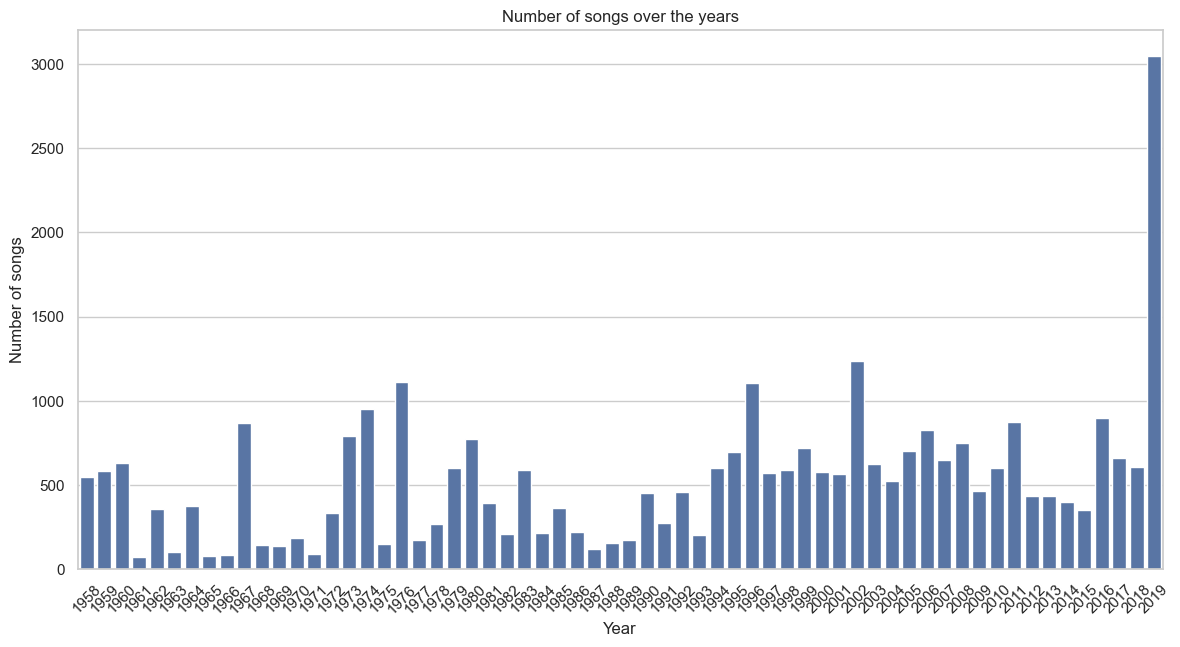

In [30]:
# Annual trends in music
plt.figure(figsize=(14, 7))
sns.countplot(data=final_merged_df, x='year', order=sorted(final_merged_df.year.unique()))
plt.xticks(rotation=45)
plt.title('Number of songs over the years')
plt.xlabel('Year')
plt.ylabel('Number of songs')
plt.show()

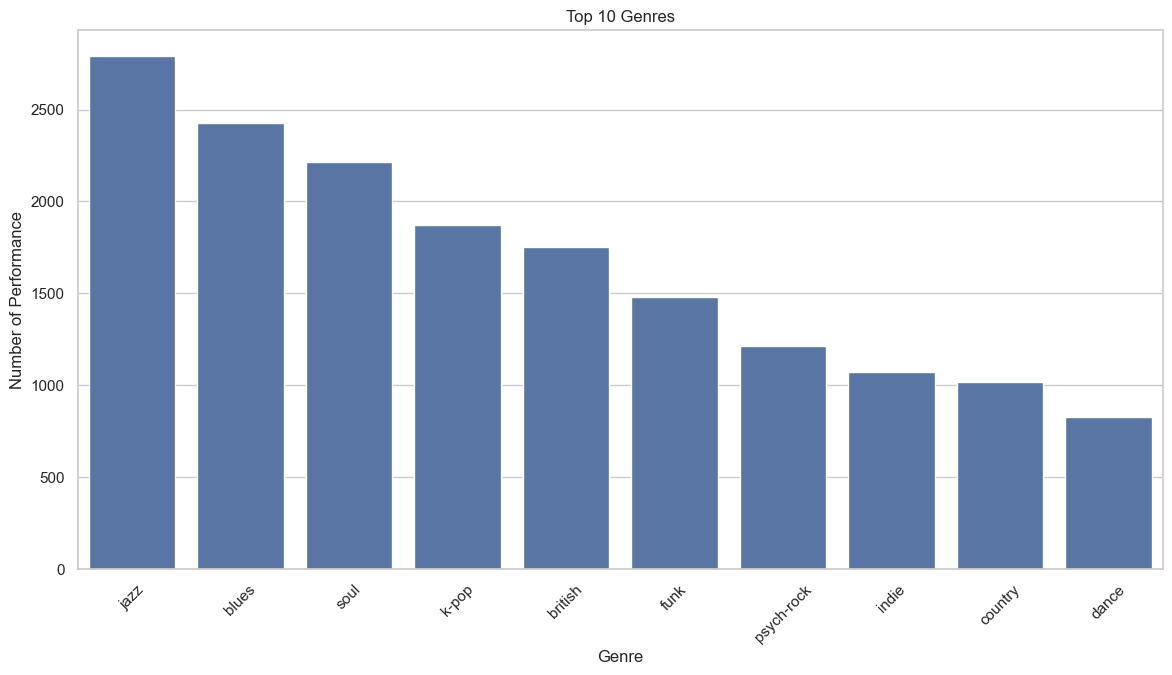

In [26]:
# chart of genre Distribution
plt.figure(figsize=(14, 7))
genre_counts = final_merged_df.track_genre.value_counts().head(10)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Performance')
plt.xticks(rotation=45)
plt.show()

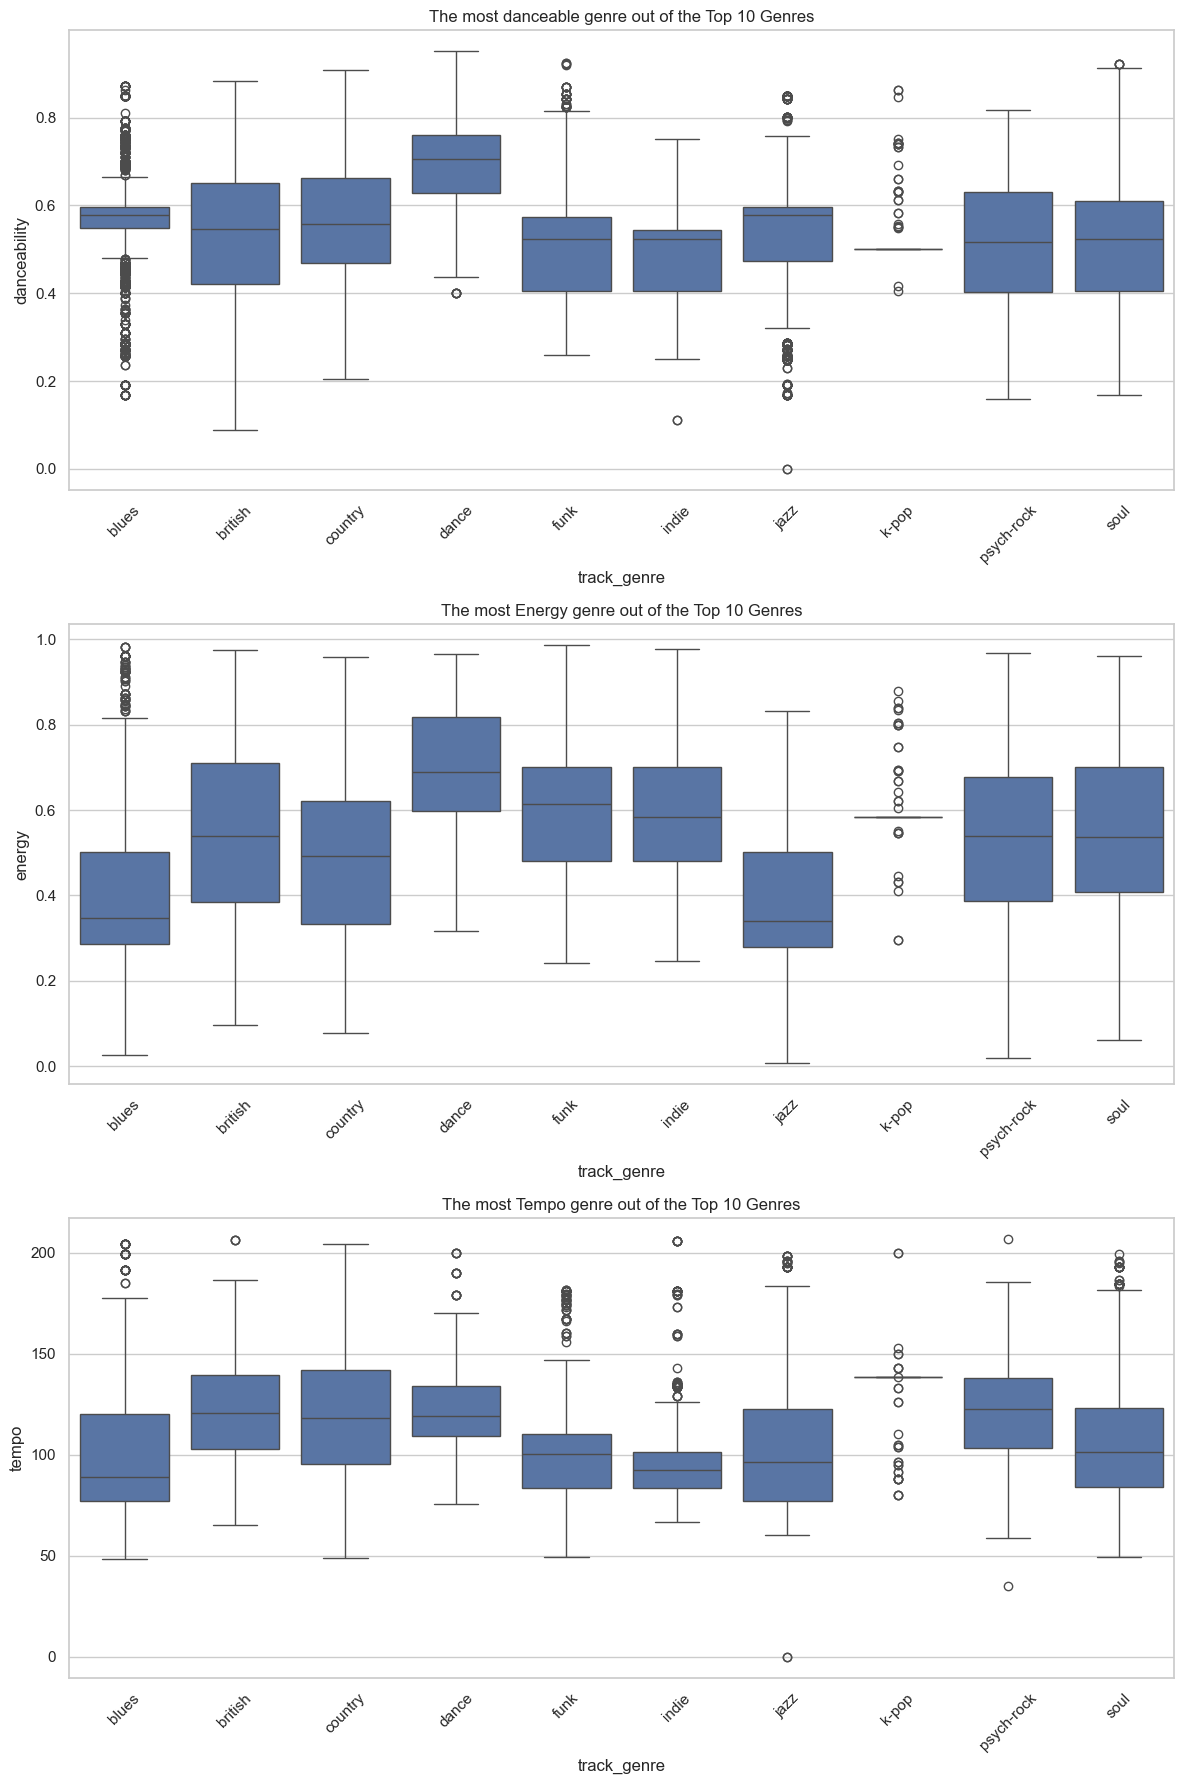

In [22]:
# chart of audio features by genre
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

top_genres = final_merged_df.track_genre.value_counts().index[:10]

sns.boxplot(ax=axes[0], data=final_merged_df[final_merged_df.track_genre.isin(top_genres)], x='track_genre', y='danceability')
axes[0].set_title('The most danceable genre out of the Top 10 Genres')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], data=final_merged_df[final_merged_df.track_genre.isin(top_genres)], x='track_genre', y='energy')
axes[1].set_title('The most Energy genre out of the Top 10 Genres')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[2], data=final_merged_df[final_merged_df.track_genre.isin(top_genres)], x='track_genre', y='tempo')
axes[2].set_title('The most Tempo genre out of the Top 10 Genres')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


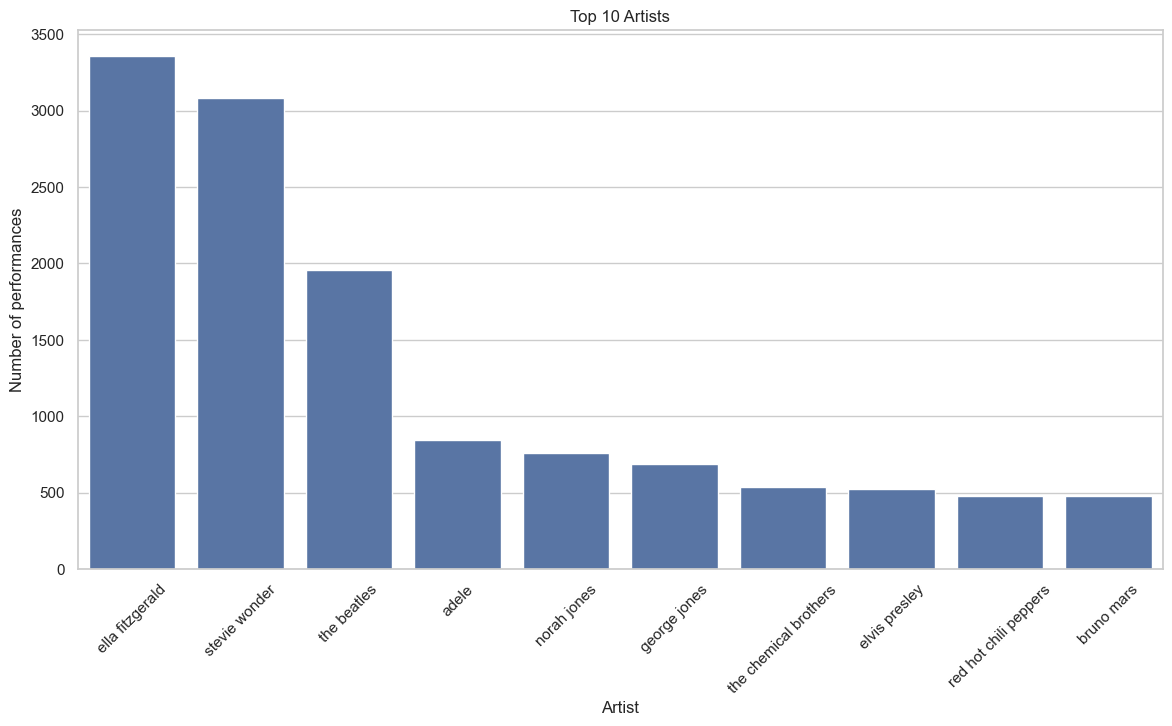

In [24]:
# Artist Frequency
plt.figure(figsize=(14, 7))
artist_counts = final_merged_df.artist.value_counts().head(10)
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.title('Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Number of performances')
plt.xticks(rotation=45)
plt.show()